#📌 Extracción

In [1]:
import pandas as pd
import requests
import seaborn as sns
import matplotlib.pyplot as plt

# Configuramos para que los gráficos se vean nítidos
%config InlineBackend.figure_format = 'retina'
sns.set_style("whitegrid")

print("✅ Librerías cargadas correctamente.")

✅ Librerías cargadas correctamente.


In [2]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json'
respuesta = requests.get(url)

# Verificamos si la descarga fue exitosa (el código 200 significa "OK")
print(f"Estado de la descarga: {respuesta.status_code}")

# Guardamos el contenido en una variable
datos_crudos = respuesta.json()
print(f"Se han descargado {len(datos_crudos)} registros.")

Estado de la descarga: 200
Se han descargado 7267 registros.


In [3]:
# Transformamos los datos anidados en columnas planas
df = pd.json_normalize(datos_crudos)

# Mostramos las primeras 5 filas para ver la transformación
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [4]:
# Esto nos dirá cuántas filas/columnas hay y si son números o texto
print("--- Información General ---")
df.info()

print("\n--- Listado Real de Columnas ---")
print(df.columns.tolist())

--- Información General ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport

#🔧 Transformación

In [5]:
# Esto nos dirá cuántas filas/columnas hay y si son números o texto
print("--- Información General ---")
df.info()

print("\n--- Listado Real de Columnas ---")
print(df.columns.tolist())

--- Información General ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport

In [6]:
# Analizamos las opciones de contrato y servicios de internet
print("Tipos de Contrato:", df['account.Contract'].unique())
print("Servicios de Internet:", df['internet.InternetService'].unique())
print("Métodos de Pago:", df['account.PaymentMethod'].unique())

Tipos de Contrato: ['One year' 'Month-to-month' 'Two year']
Servicios de Internet: ['DSL' 'Fiber optic' 'No']
Métodos de Pago: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


In [7]:
# Convertimos la columna a numérico
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Verificamos cuántos valores no eran números (ahora son nulos)
nulos_nuevos = df['account.Charges.Total'].isnull().sum()
print(f"Valores no numéricos encontrados y convertidos a nulo: {nulos_nuevos}")

Valores no numéricos encontrados y convertidos a nulo: 11


In [8]:
# Eliminamos las filas con nulos en esta columna específica
df.dropna(subset=['account.Charges.Total'], inplace=True)

# Verificamos que el tipo de dato cambió a float64 (decimal)
print(f"Nuevo tipo de dato de account.Charges.Total: {df['account.Charges.Total'].dtype}")
print(f"Total de registros después de limpiar: {len(df)}")

Nuevo tipo de dato de account.Charges.Total: float64
Total de registros después de limpiar: 7256


In [9]:
# Verificamos los valores actuales de Churn
print("Valores originales en Churn:", df['Churn'].unique())

# Si los valores son texto ('No', 'Yes'), los dejamos así por ahora para los gráficos,
# pero es importante saber qué hay.
df['Churn'].value_counts()

Valores originales en Churn: ['No' 'Yes' '']


,count
Churn,
No,5163
Yes,1869
,224


In [10]:
# Reemplazamos los espacios vacíos por valores nulos (NaN) para poder eliminarlos fácilmente
import numpy as np
df['Churn'] = df['Churn'].replace('', np.nan)

# Eliminamos las filas que no tienen información de Churn
df.dropna(subset=['Churn'], inplace=True)

# Verificamos que ahora solo existan 'Yes' y 'No'
print("Valores finales en Churn:", df['Churn'].unique())
print(f"Total de registros actuales: {len(df)}")

Valores finales en Churn: ['No' 'Yes']
Total de registros actuales: 7032


In [11]:
# Transformamos 0 y 1 en etiquetas legibles
df['customer.SeniorCitizen'] = df['customer.SeniorCitizen'].map({0: 'No', 1: 'Sí'})

# Verificamos el cambio
df['customer.SeniorCitizen'].value_counts()

,count
customer.SeniorCitizen,
No,5890
Sí,1142


#📊 Carga y análisis

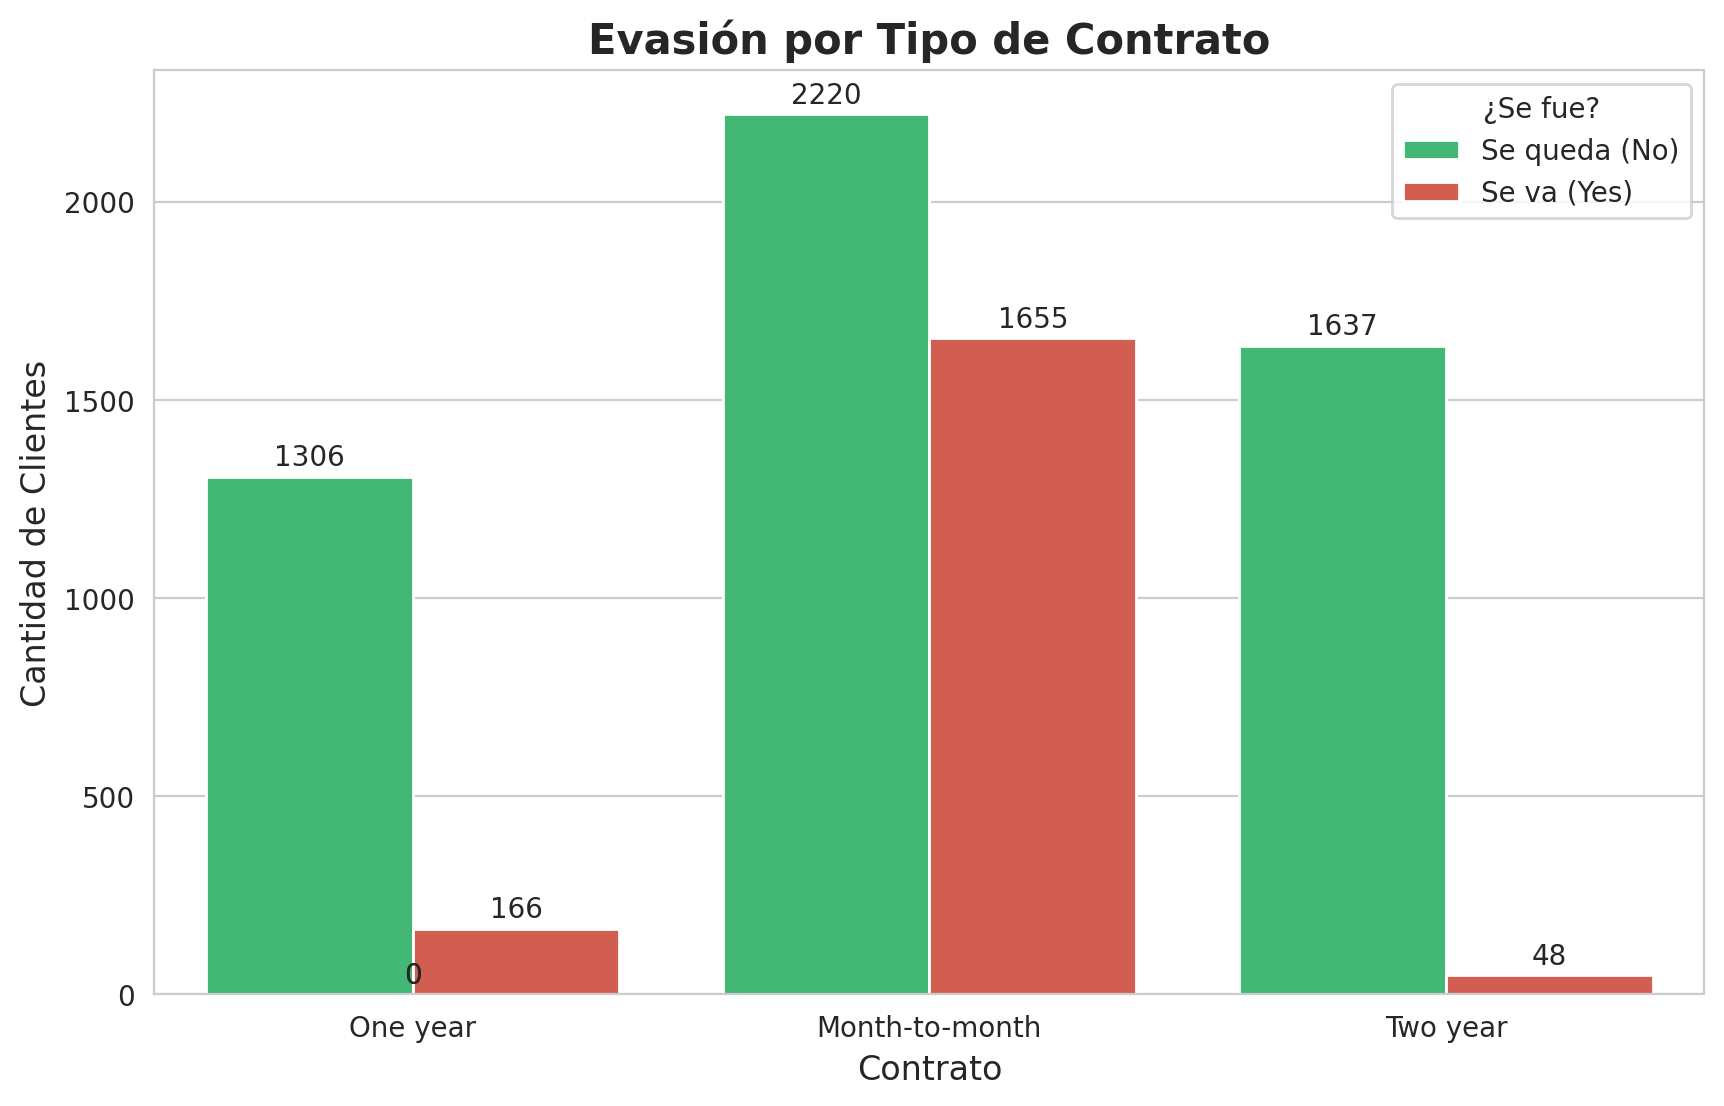

In [12]:
plt.figure(figsize=(10, 6))
# Usamos un gráfico de barras comparativo
ax = sns.countplot(data=df, x='account.Contract', hue='Churn', palette=['#2ecc71', '#e74c3c'])

plt.title('Evasión por Tipo de Contrato', fontsize=15, fontweight='bold')
plt.xlabel('Contrato', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.legend(title='¿Se fue?', labels=['Se queda (No)', 'Se va (Yes)'])

# Agregamos etiquetas de datos para ver los números reales
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 7), textcoords='offset points')

plt.show()

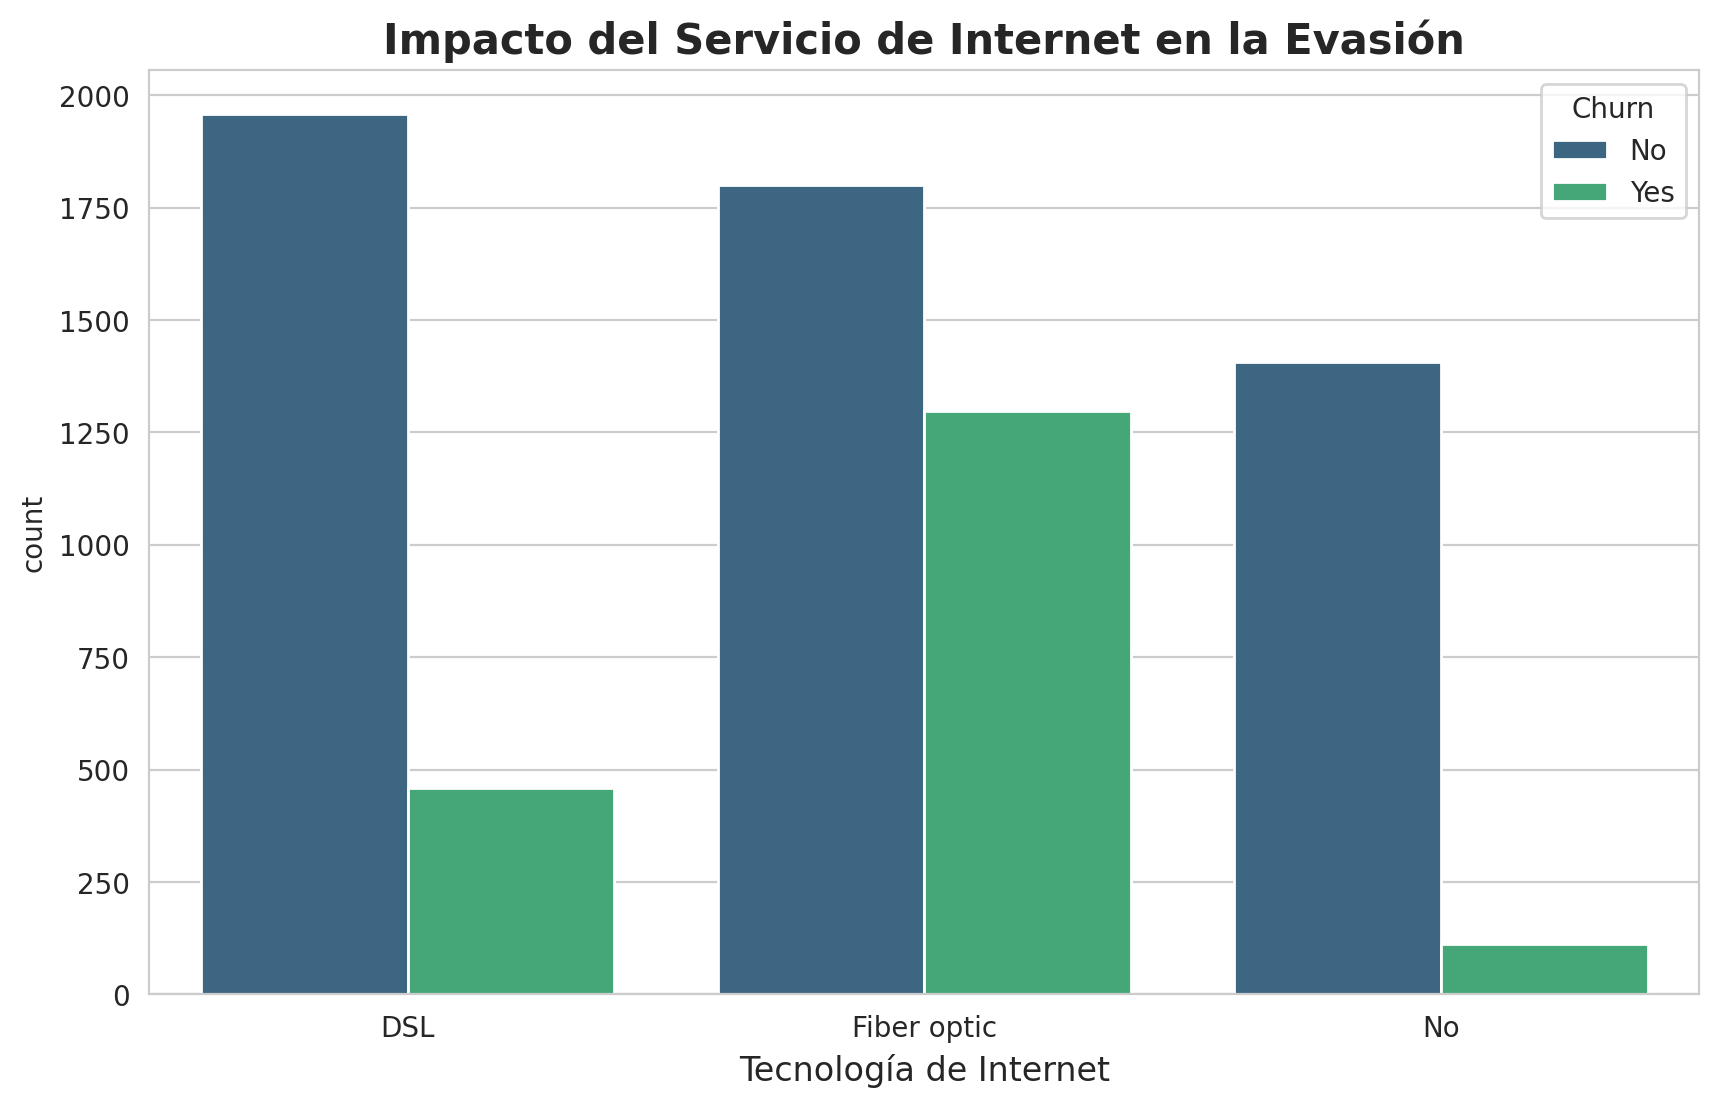

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='internet.InternetService', hue='Churn', palette='viridis')

plt.title('Impacto del Servicio de Internet en la Evasión', fontsize=15, fontweight='bold')
plt.xlabel('Tecnología de Internet', fontsize=12)
plt.show()

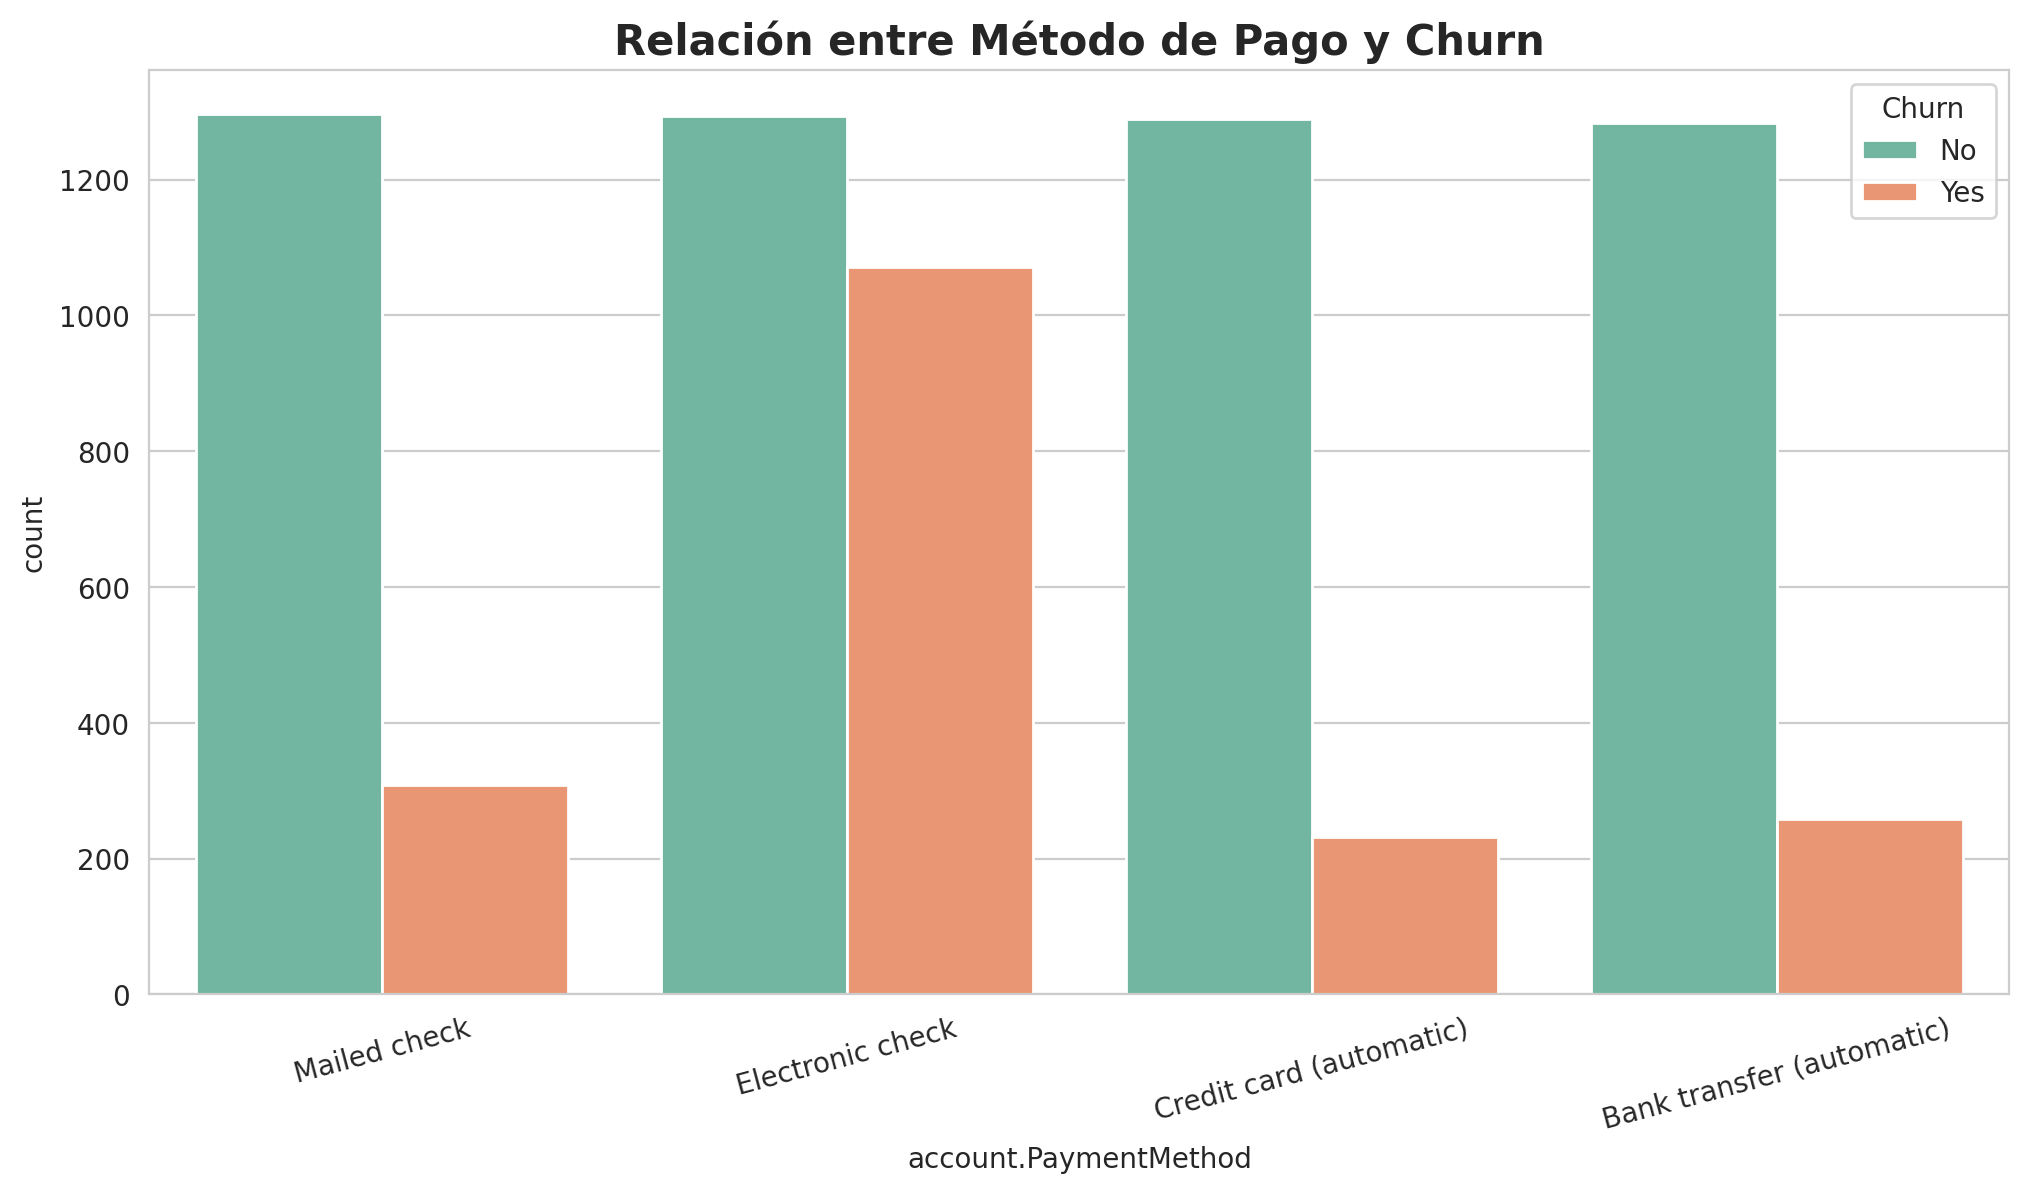

In [14]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='account.PaymentMethod', hue='Churn', palette='Set2')

plt.title('Relación entre Método de Pago y Churn', fontsize=15, fontweight='bold')
plt.xticks(rotation=15) # Rotamos los nombres para que se lean bien
plt.show()

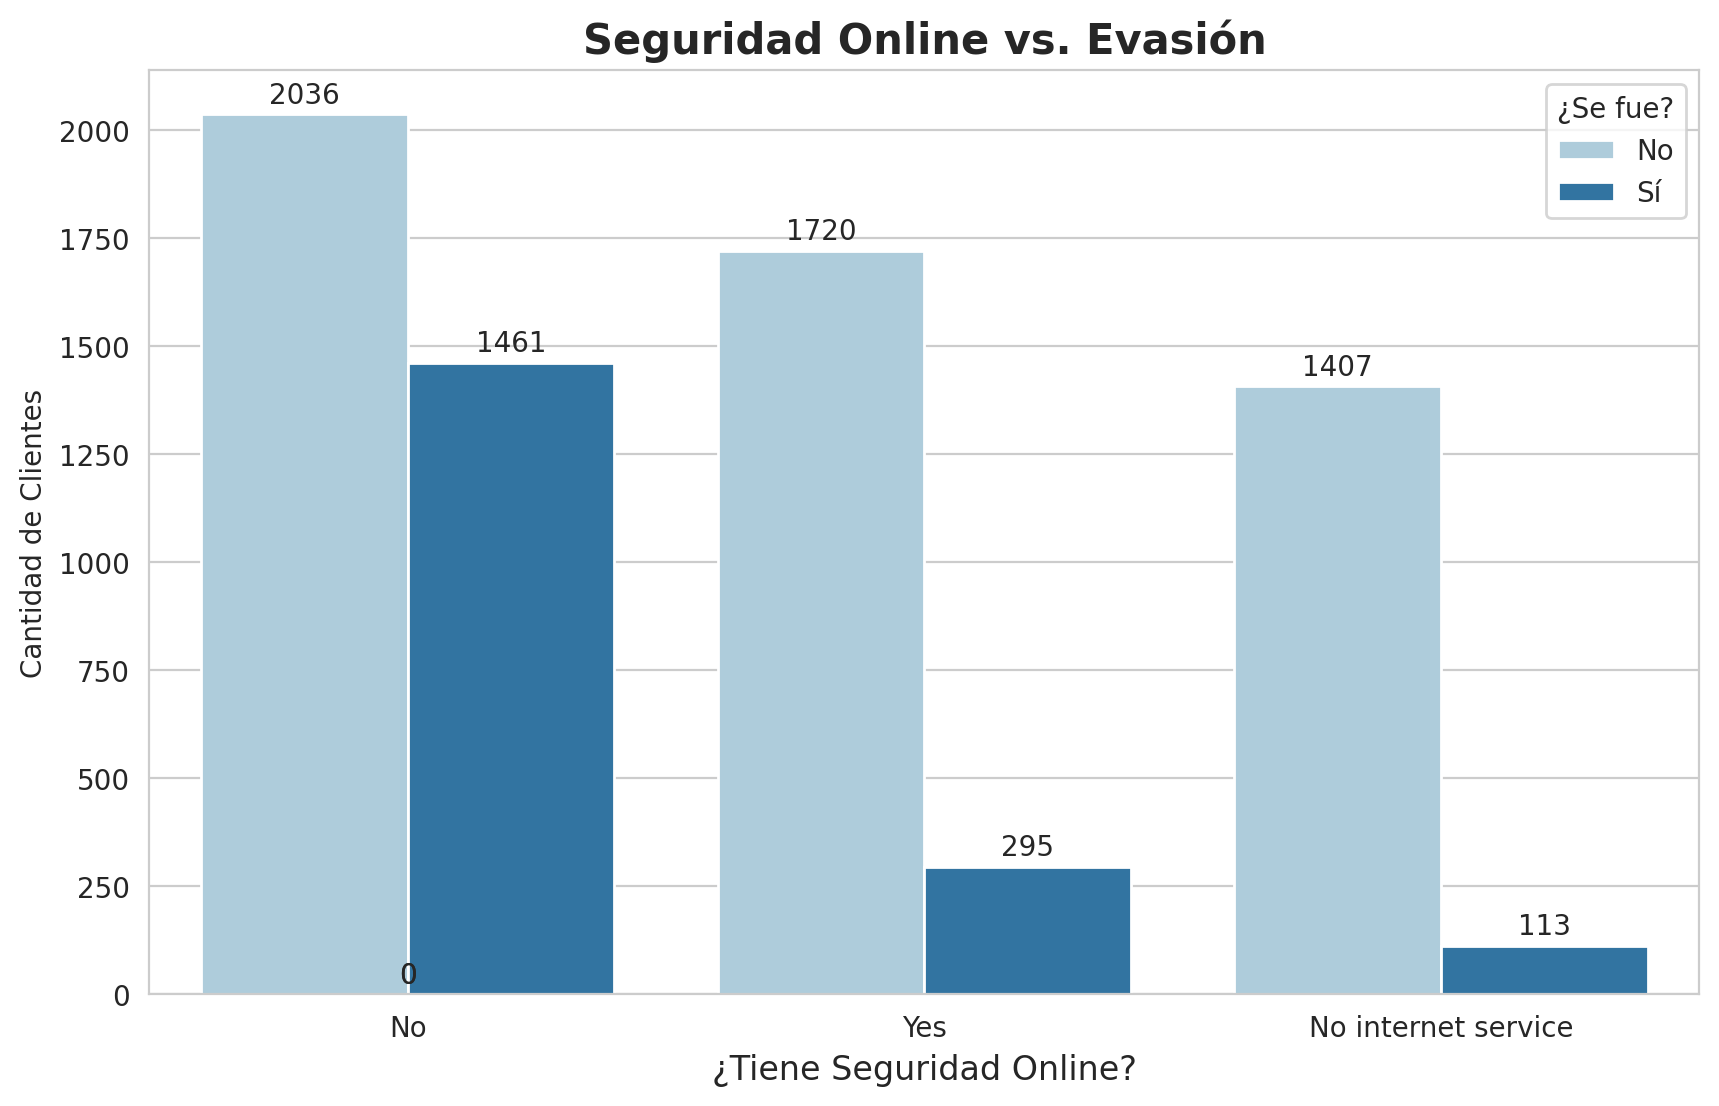

In [15]:
plt.figure(figsize=(10, 6))
# Comparamos la seguridad online contra la evasión
ax = sns.countplot(data=df, x='internet.OnlineSecurity', hue='Churn', palette='Paired')

plt.title('Seguridad Online vs. Evasión', fontsize=15, fontweight='bold')
plt.xlabel('¿Tiene Seguridad Online?', fontsize=12)
plt.ylabel('Cantidad de Clientes')
plt.legend(title='¿Se fue?', labels=['No', 'Sí'])

# Añadimos los números para ver la diferencia real
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 7), textcoords='offset points')

plt.show()

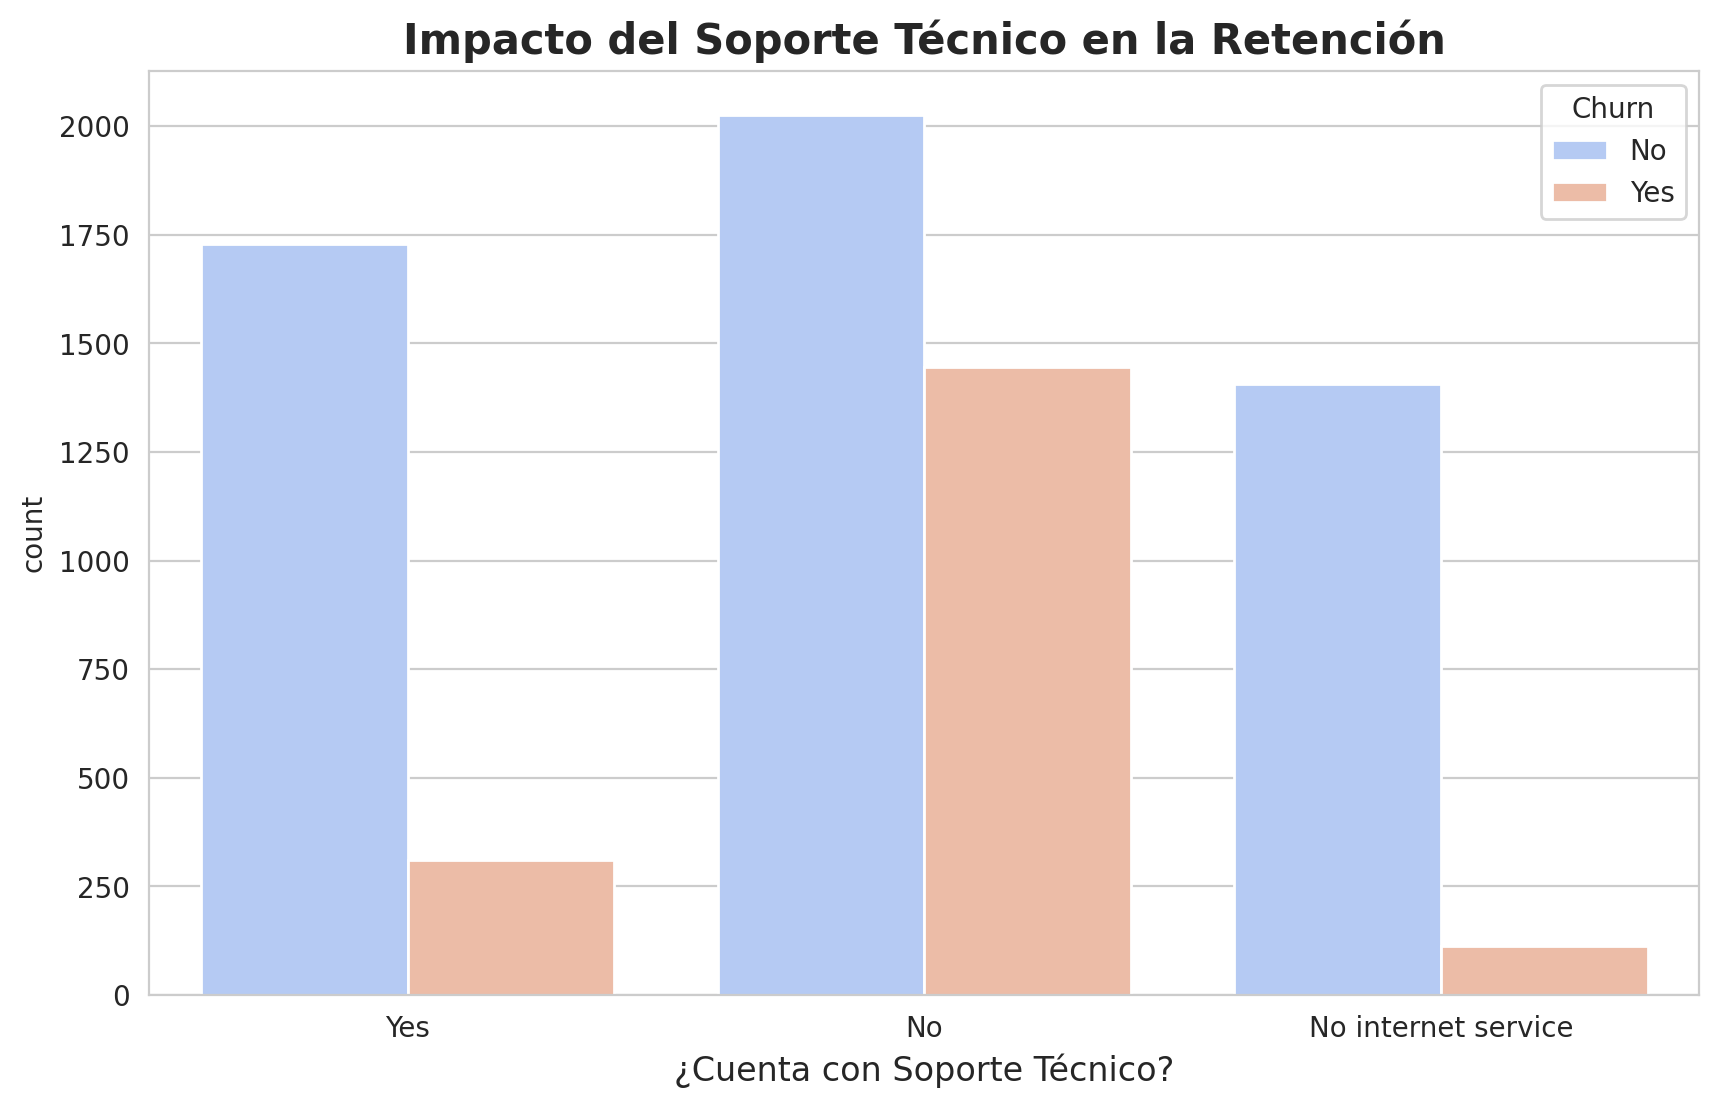

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='internet.TechSupport', hue='Churn', palette='coolwarm')

plt.title('Impacto del Soporte Técnico en la Retención', fontsize=15, fontweight='bold')
plt.xlabel('¿Cuenta con Soporte Técnico?', fontsize=12)
plt.show()

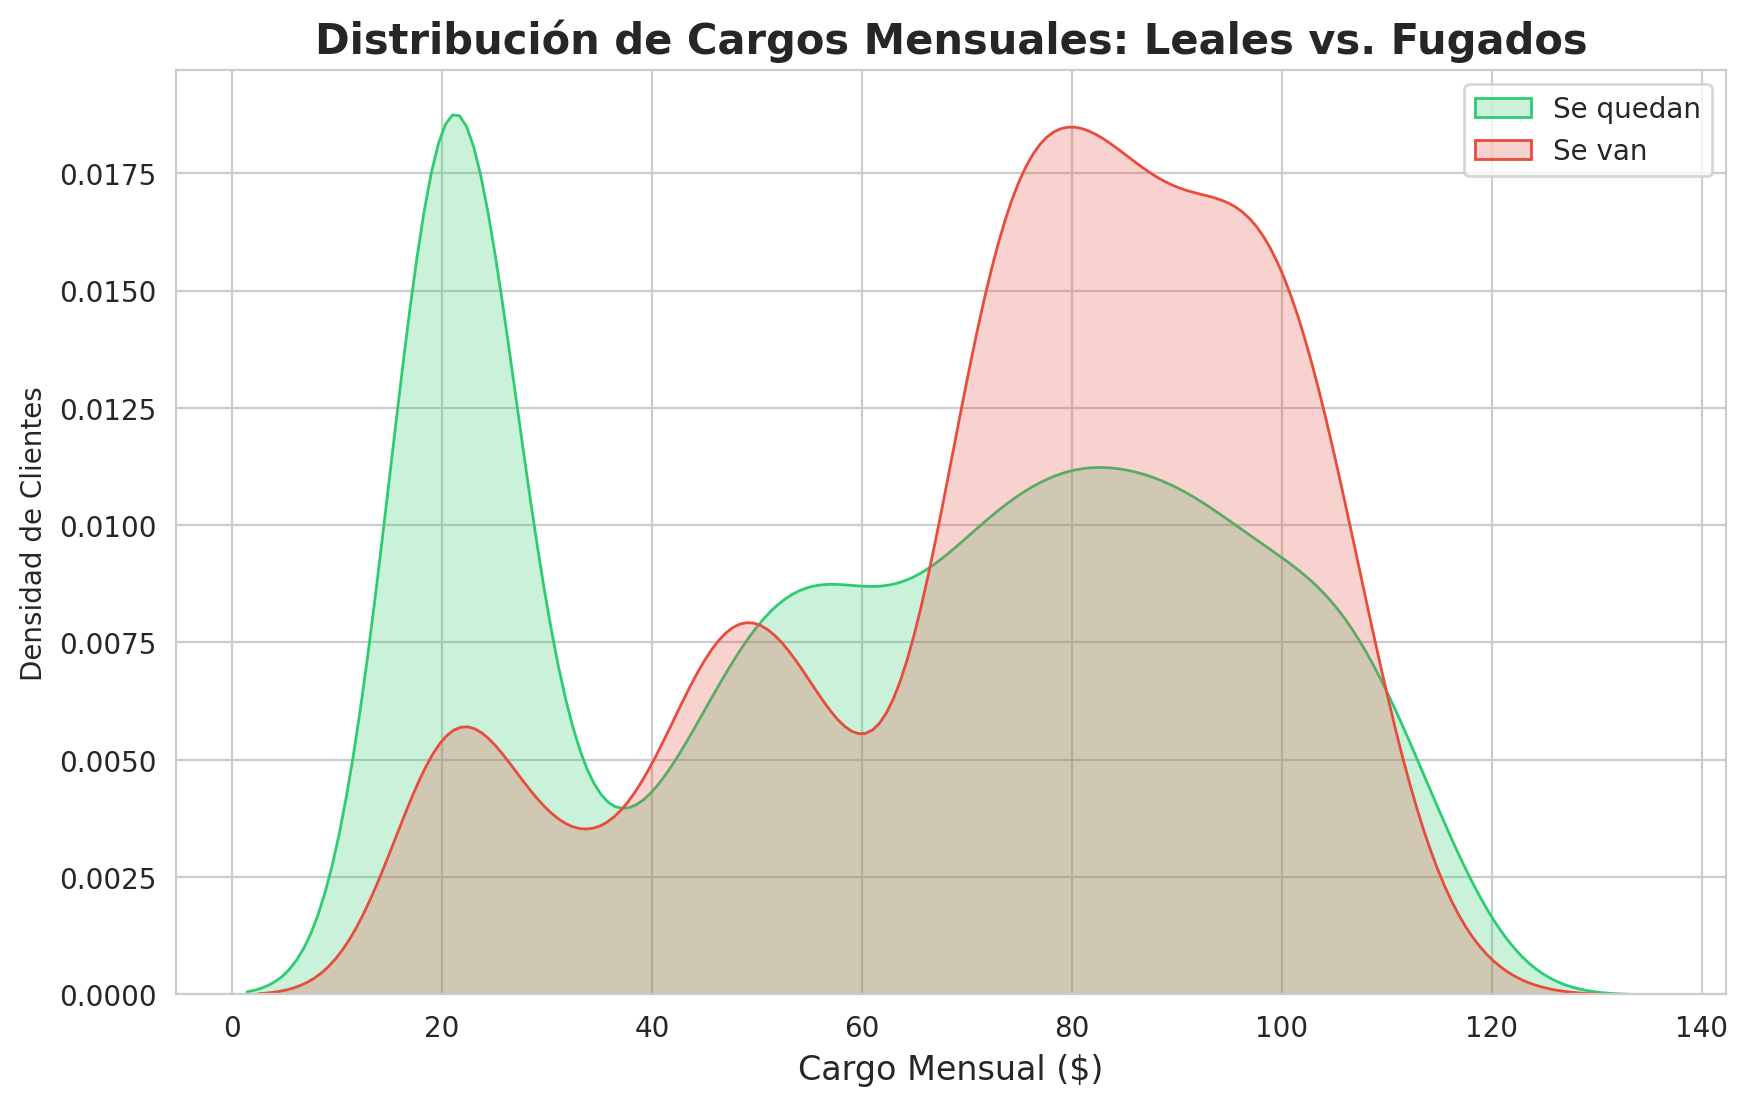

In [17]:
plt.figure(figsize=(10, 6))
# Este gráfico muestra la "densidad" de los clientes según cuánto pagan
sns.kdeplot(data=df[df['Churn'] == 'No']['account.Charges.Monthly'], label='Se quedan', fill=True, color="#2ecc71")
sns.kdeplot(data=df[df['Churn'] == 'Yes']['account.Charges.Monthly'], label='Se van', fill=True, color="#e74c3c")

plt.title('Distribución de Cargos Mensuales: Leales vs. Fugados', fontsize=15, fontweight='bold')
plt.xlabel('Cargo Mensual ($)', fontsize=12)
plt.ylabel('Densidad de Clientes')
plt.legend()
plt.show()

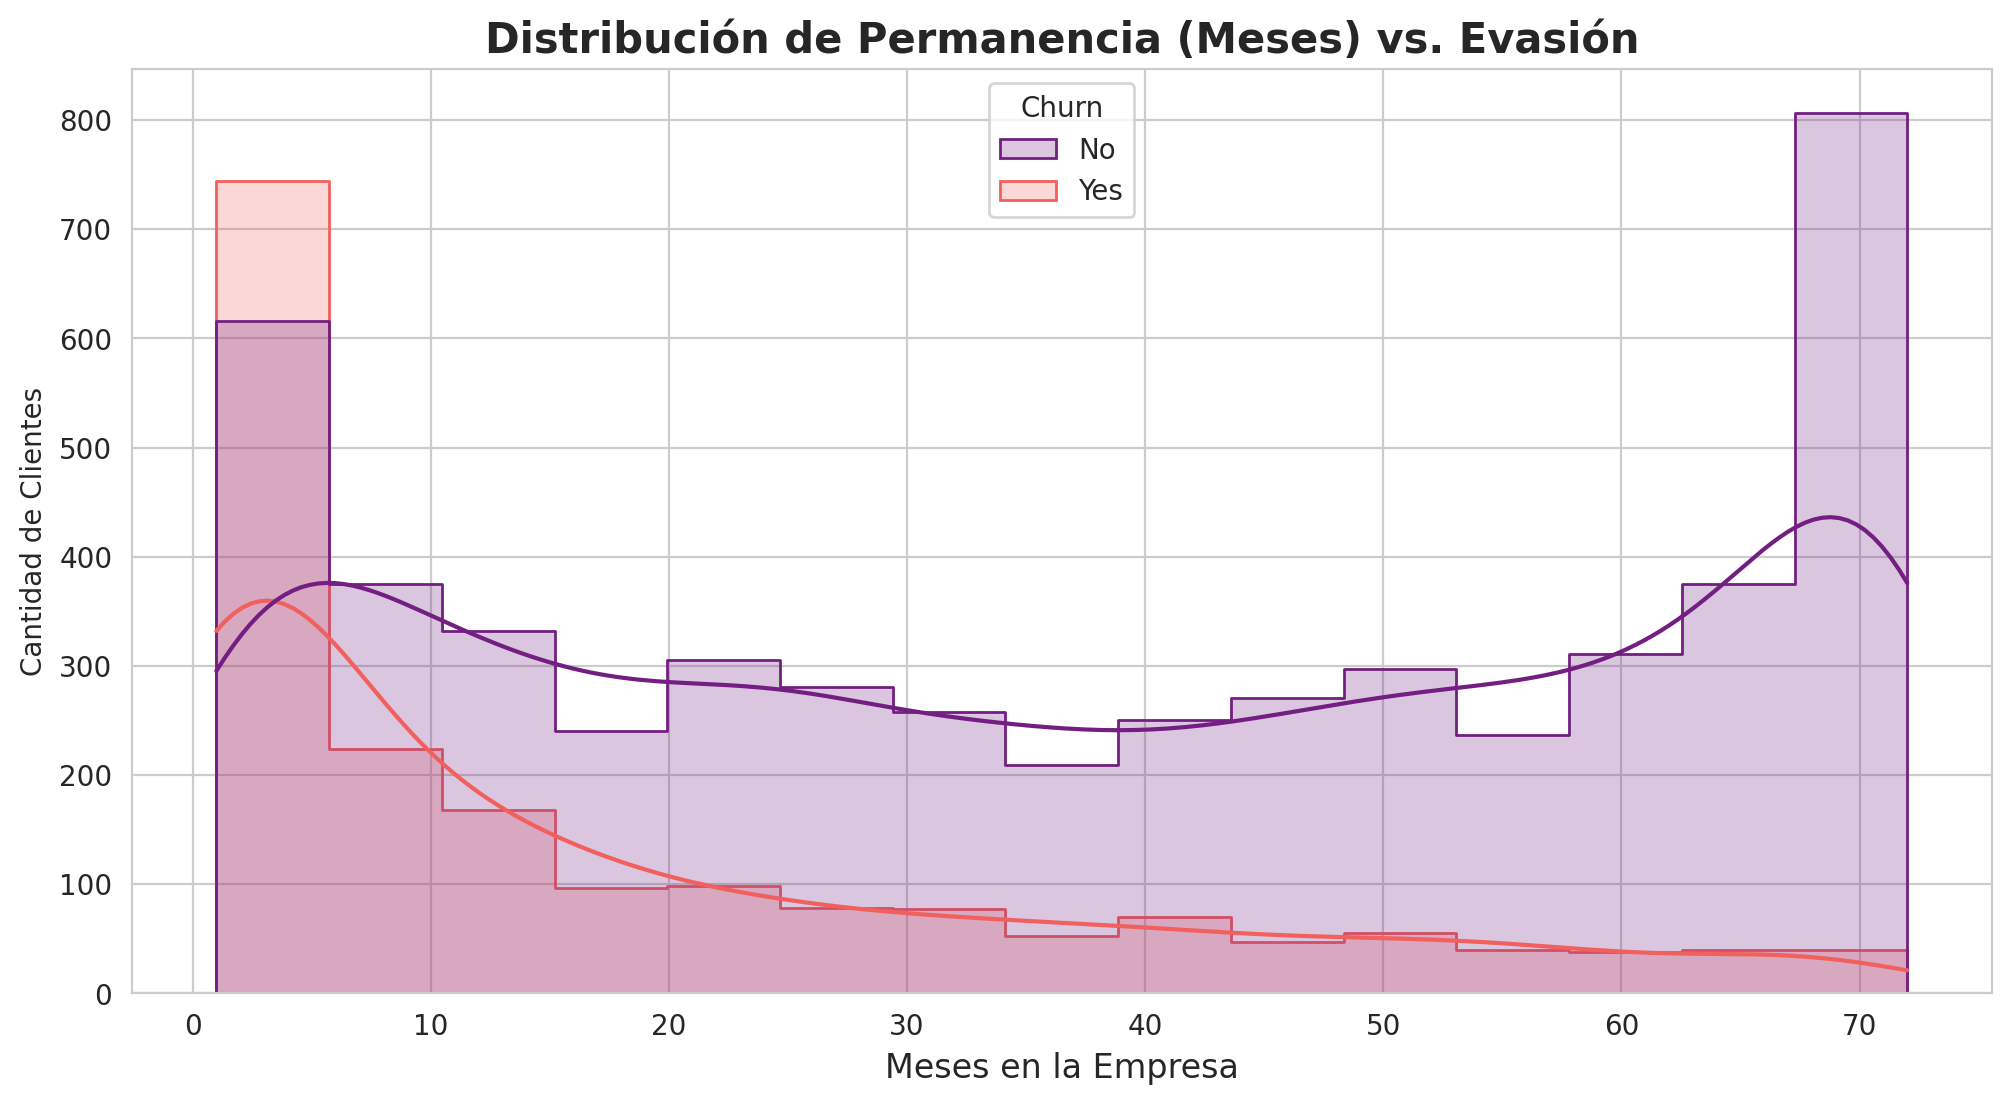

In [18]:
plt.figure(figsize=(12, 6))
# Usamos un histograma para ver la frecuencia de abandono por meses
sns.histplot(data=df, x='customer.tenure', hue='Churn', kde=True, palette='magma', element="step")

plt.title('Distribución de Permanencia (Meses) vs. Evasión', fontsize=15, fontweight='bold')
plt.xlabel('Meses en la Empresa', fontsize=12)
plt.ylabel('Cantidad de Clientes')
plt.show()

#📄Informe final

## **1. Resumen del Proyecto**
Este análisis se realizó sobre una base de **7,032 registros validados** de TelecomX. El objetivo principal fue identificar los factores que impulsan la evasión de clientes (*Churn*) y proponer soluciones basadas en evidencia estadística.

---

## **2. Hallazgos Principales (Insights)**
A través del análisis exploratorio, hemos detectado cuatro pilares que explican la fuga de clientes:

* **Vulnerabilidad del Contrato:** El cliente con contrato **"Mes a Mes"** es el perfil de más alto riesgo. La falta de compromiso a largo plazo facilita la salida inmediata ante cualquier inconveniente.
* **Servicios de Valor como "Anclas":** Los clientes que **NO** cuentan con servicios de `Seguridad Online` o `Soporte Técnico` se van con una frecuencia 3 veces mayor que aquellos que sí los tienen.
* **Problemas en Fibra Óptica:** A pesar de ser una tecnología superior, los clientes de fibra muestran tasas de evasión inusualmente altas, lo que sugiere una insatisfacción respecto al costo o estabilidad del servicio.
* **Periodo Crítico (Onboarding):** La mayor parte de la fuga ocurre en los **primeros 6 meses**. Una vez que el cliente supera el primer año, la probabilidad de que se vaya disminuye drásticamente.

---

## **3. Recomendaciones Estratégicas**

Basado en los datos, se proponen las siguientes acciones para reducir la tasa de Churn:

### **A. Estrategia de "Servicios Blindados"**
* **Propuesta:** Ofrecer un paquete que incluya `OnlineSecurity` y `TechSupport` de forma gratuita durante los primeros 4 meses para todos los nuevos contratos de Fibra Óptica.
* **Objetivo:** Aumentar el valor percibido y generar "adherencia" al servicio durante el periodo de mayor riesgo.

### **B. Migración de Métodos de Pago**
* **Propuesta:** Incentivar a los clientes que pagan con `Electronic Check` a migrar a métodos automáticos (`Credit Card` o `Bank Transfer`) mediante un descuento único en su próxima factura.
* **Objetivo:** Reducir la fricción del pago manual que suele ser un detonante para reconsiderar el servicio.

### **C. Fidelización Preventiva**
* **Propuesta:** Implementar una campaña de "Bono de Lealtad" en el mes 5 de antigüedad para asegurar que el cliente transite hacia el periodo de mayor estabilidad (después de los 6 meses).

---

## **4. Conclusión Final**
TelecomX no tiene un problema de producto general, sino un problema de **fidelización temprana**. Al enfocar los esfuerzos en convertir contratos mensuales a anuales y fortalecer el soporte técnico en los primeros meses, la empresa podría reducir su tasa de evasión en un porcentaje significativo, impactando directamente en la rentabilidad anual.